<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for EDA: </b> 
        <ul>
            <li>define a limit for null values</li>
            <li>deal with columns that is not important (url, address, phone, reviews_list)</li>
            <li>Relation between Location and Rating</li>
            <li>Relation between Type and Rating</li>
            <li>Relation between Cost of Restaurant and Rating</li>
            <li>Restaurants delivering Online or not</li>
            <li>Relation between (Restaurants have booking and not have) with Rating</li>
        </ul>       
    </span>    
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = None
zomato_df = pd.read_csv(r'E:\data analysis projects\Zomato Data Set Analysis & Visualization\zomato.csv')

In [3]:
zomato_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [4]:
# fixing rating

def fix_rate(rate):
    if rate == 'NEW' or rate == '-' or rate == np.nan:
        return np.nan
    else:
        new_rate = str(rate).split('/')
    return float(new_rate[0])

zomato_df['rate'] = zomato_df['rate'].apply(fix_rate)

zomato_df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [55]:
zomato_df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [69]:
# fixing cost

def fix_cost(cost):
    cost = str(cost).replace(',','')
    return float(cost)

zomato_df['approx_cost(for two people)'] = zomato_df['approx_cost(for two people)'].apply(fix_cost)

zomato_df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [5]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. null values:
            </span>   
        </font>    
</h2>

In [6]:
columns_with_null = []

rows = len(zomato_df)

for col in zomato_df.columns:
    if zomato_df[col].isna().sum() > 0:
        columns_with_null.append([col, zomato_df[col].isna().sum() / rows * 100])

columns_with_null

[['rate', 19.436548910416303],
 ['phone', 2.335789005549432],
 ['location', 0.04060560357329312],
 ['rest_type', 0.438927238625597],
 ['dish_liked', 54.29162557766305],
 ['cuisines', 0.08701200765705668],
 ['approx_cost(for two people)', 0.669025658874258]]

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        As seen there is only one column that have more than 40% missing values so this column will be removed
    </span>    
</div>

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. deal with columns that is not important (url, address, phone, reviews_list):
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        This columns is nuneeded columns so you need to drop them.
    </span>    
</div>

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Relation between Location and Rating:
            </span>   
        </font>    
</h2>

In [43]:
# get top 20 rated Cities

Locations_cities = pd.DataFrame(zomato_df.groupby('location')['rate'].mean())
Locations_cities['location_count'] = zomato_df['location'].value_counts()
top20 = Locations_cities.sort_values(by='location_count' ,ascending=False).head(20)
top20

,rate,location_count
location,,
BTM,3.573740,5124
HSR,3.672164,2523
Koramangala 5th Block,4.005821,2504
JP Nagar,3.675306,2235
Whitefield,3.621618,2144
Indiranagar,3.828154,2083
Jayanagar,3.780280,1926
Marathahalli,3.541927,1846
Bannerghatta Road,3.507449,1630


### realation between top 20 and rate


d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


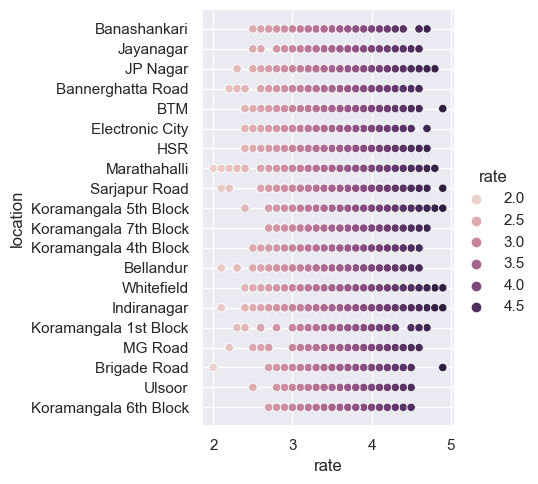

In [46]:
top_locations = top20.index


sns.relplot(
    data=zomato_df[zomato_df['location'].isin(top_locations)],
    x='rate',
    y='location',
    hue='rate',
    kind ="scatter",
)

In [8]:
len(zomato_df['location'].unique())

94

In [9]:
zomato_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

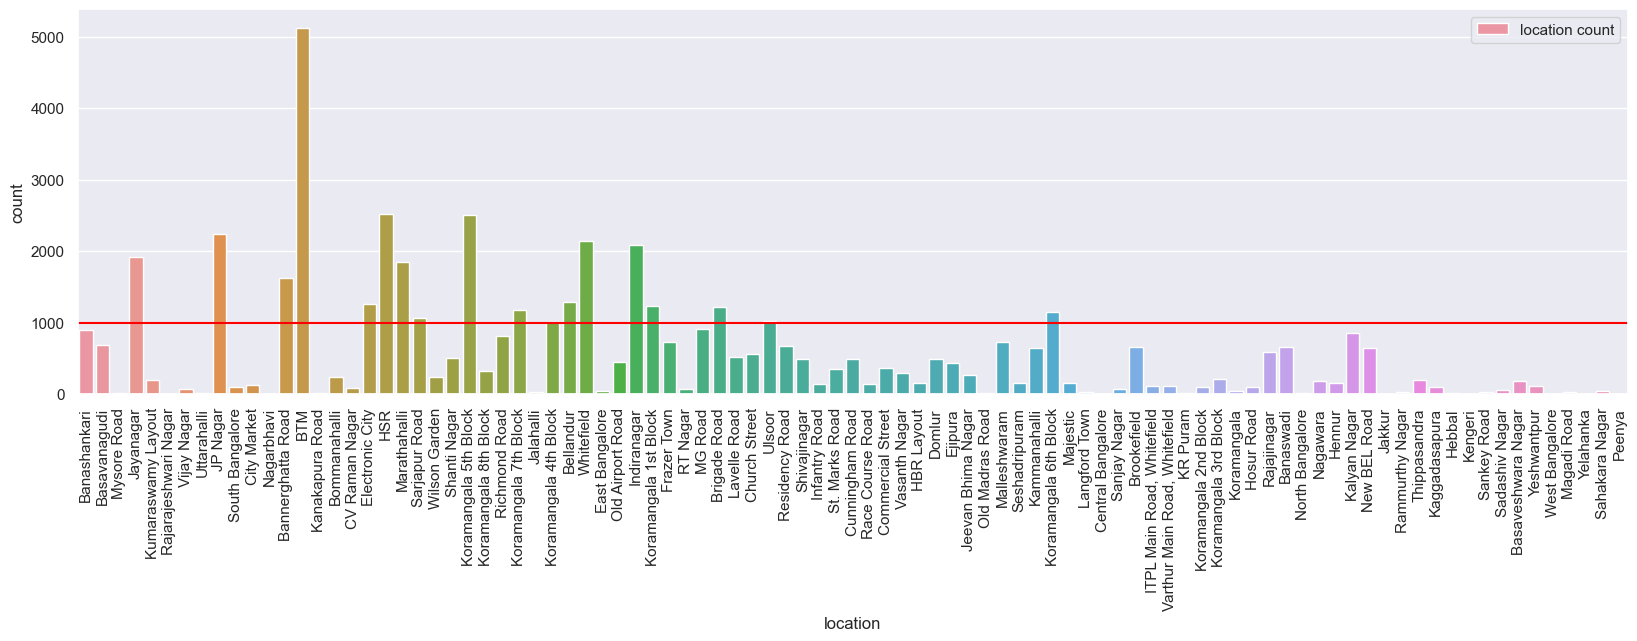

In [60]:
plt.figure(figsize=(20, 5))
sns.countplot(
    data=zomato_df,
    x=zomato_df['location'],
    label='location count'
)
plt.axhline(
    y = 1000,
    color='red',
)
plt.xticks(rotation = 90)
plt.legend()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        you need to categorize any location that has less than 1000 as a other
    </span>    
</div>

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Relation between Type and Rating:
            </span>   
        </font>    
</h2>

In [17]:
zomato_df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [51]:
Resturant_type = pd.DataFrame(zomato_df.groupby('listed_in(type)')['rate'].mean())

Resturant_type.sort_values(by='rate', ascending=False)

,rate
listed_in(type),
Pubs and bars,4.022933
Drinks & nightlife,4.017062
Buffet,3.982105
Cafes,3.872477
Desserts,3.777013
Dine-out,3.680826
Delivery,3.653257


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


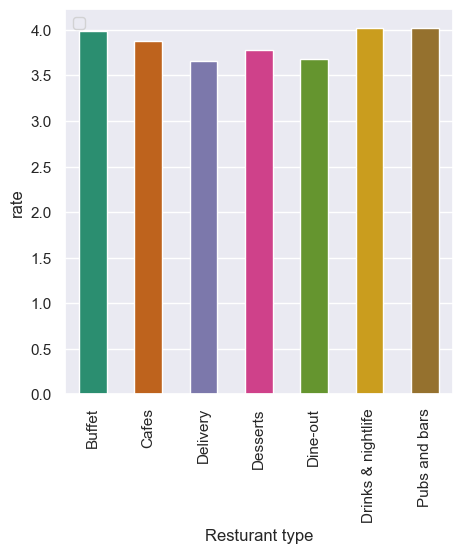

In [27]:
plt.figure(figsize=(5, 5))
sns.barplot(
    data=zomato_df,
    x='listed_in(type)',
    y='rate',
    errorbar=None,
    estimator='mean',
    width=.5,
    palette='Dark2'
)
plt.xlabel('Resturant type')
plt.xticks(rotation = 90)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


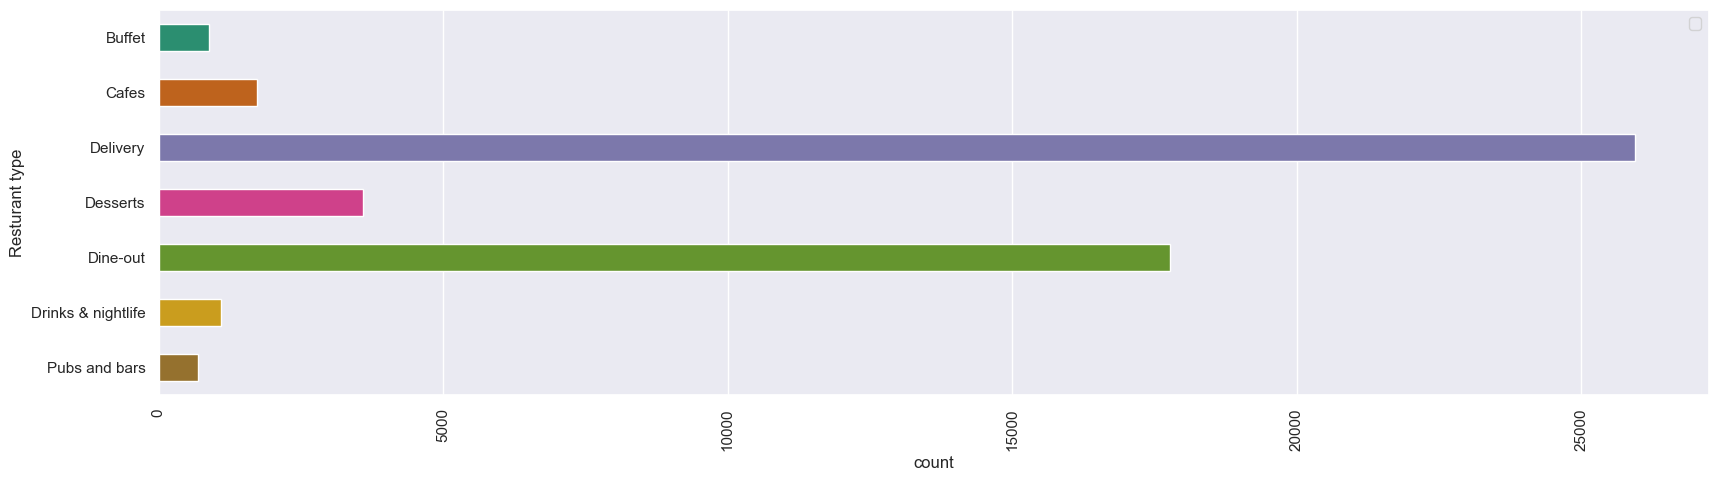

In [25]:
sns.set(style='darkgrid')
plt.figure(figsize=(20, 5))
sns.countplot(
    data=zomato_df,
    y='listed_in(type)',
    width=.5,
    palette='Dark2',
)
plt.xticks(rotation = 90)
plt.ylabel('Resturant type')
plt.legend()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        The resturant with type Delivery, has the maximum number of resturants and the lowest rate betweent all types
        <br>
        and The resturant with type Pubs and bars, has the minimum number of resturants and the highst rate betweent all types
    </span>    
</div>

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. Relation between Cost of Restaurant and Rating:
            </span>   
        </font>    
</h2>

In [53]:
zomato_df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

<Axes: >

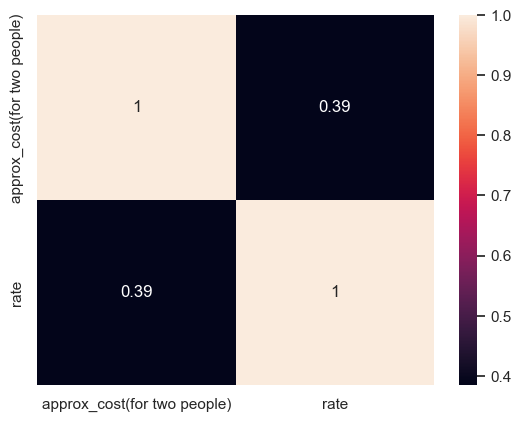

In [59]:
relations = zomato_df[['approx_cost(for two people)', 'rate']].corr()
sns.heatmap(
    relations,
    annot=True
)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        There is no strong relation between cost and rate
    </span>    
</div>

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. Restaurants delivering Online or not:
            </span>   
        </font>    
</h2>

In [63]:
zomato_df['online_order'].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

<Axes: xlabel='online_order', ylabel='count'>

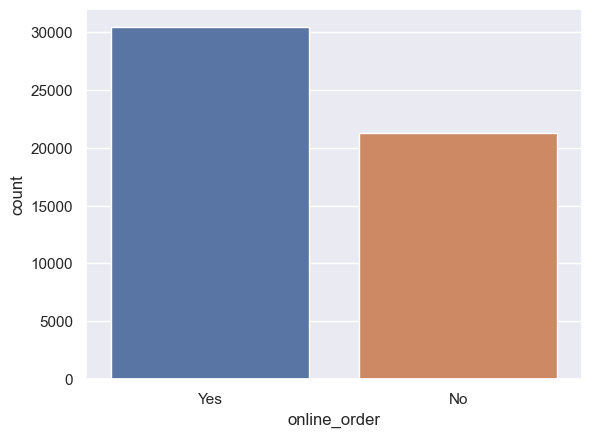

In [64]:
sns.countplot(
    x=zomato_df['online_order']
)

<Axes: xlabel='online_order', ylabel='rate'>

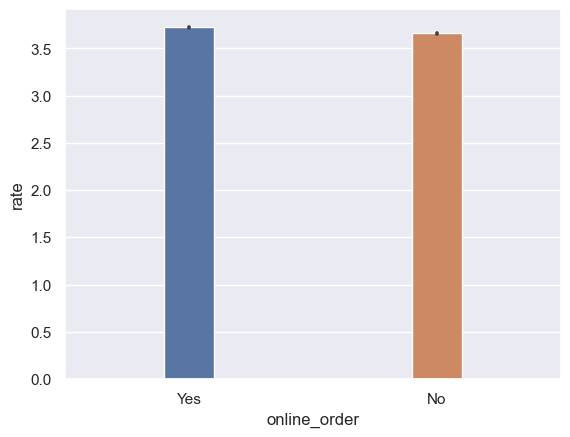

In [68]:
sns.barplot(
    x=zomato_df['online_order'],
    y= zomato_df['rate'],
    width=.2
)